<IPython.core.display.Javascript object>


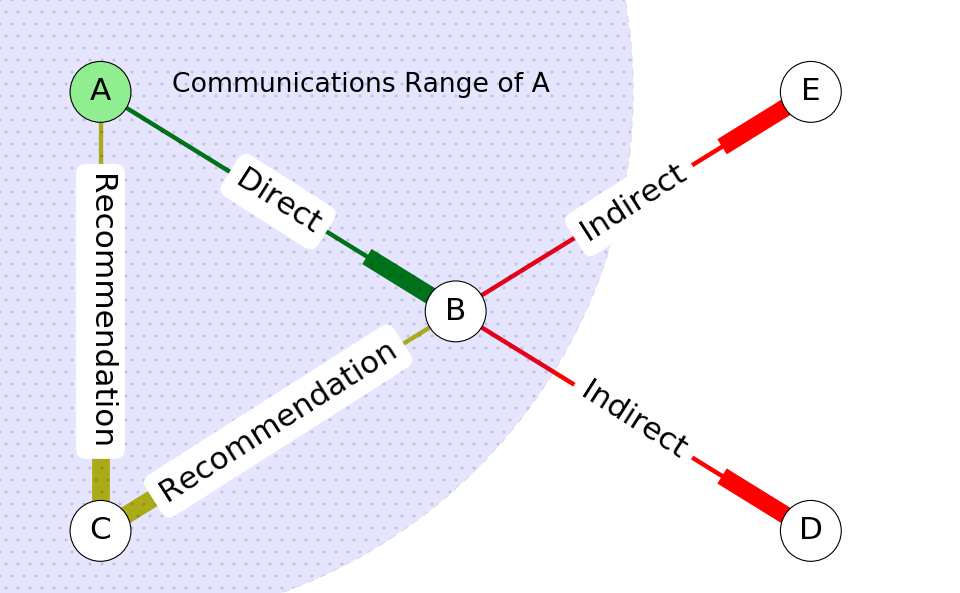

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pylab as plt
w=12
node_font_size = 28
edge_font_size = 28

import networkx as nx
import scipy.constants
nodedict = {"A":(25,35),"B":(30,30),"C":(25,25),"D":(35,25),"E":(35,35)}
direct = {'type':'Direct', 'color':'g', 'weight':4}
indirect = {'type':'Indirect', 'color':'r', 'weight':1}
recommend = {'type':'Recommendation', 'color':'y', 'weight':2}
edgelist = [("A","B", direct),
            ("A","C", direct),
            ("B","C", recommend),
            ("A","C", recommend),
            ("B","D", indirect),
            ("B","E", indirect),
            ]
G = nx.DiGraph()
G.add_nodes_from(nodedict.keys())
G.add_edges_from(edgelist, alpha = 0.5)
pos = nx.spring_layout(G)
for n,p in nodedict.iteritems():
    G.node[n]['pos'] = p
nodelist = [ '#90EE90' if n == 'A' else 'w' for n in G.nodes() ]
nodealpha = [ 0.1 if n == 'A' else 1.0 for n in G.nodes() ]
fig, ax = plt.subplots(1, 1, figsize=(w, w / scipy.constants.golden))
nx.draw_networkx(G, nodedict, arrows=True, ax=ax,
        cmap = plt.get_cmap('jet'), node_size = 3000, width=4, 
        node_color=nodelist, edge_color=[e[2]['color'] for e in G.edges(data=True)],
        alpha = 1.0, font_size = node_font_size)
nx.draw_networkx_edge_labels(G,nodedict,{(k1,k2):e['type'] for k1,k2,e in G.edges_iter(data=True)},
                             font_size=edge_font_size)

ax.set_axis_off()
cut = 1.06
xmax= cut*max(xx for xx,yy in nodedict.values())
ymax= cut*max(yy for xx,yy in nodedict.values())
xmin= (1/cut)*min(xx for xx,yy in nodedict.values())
ymin= (1/cut)*min(yy for xx,yy in nodedict.values())
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)


r = 15
ax.add_patch(matplotlib.patches.Ellipse((25,35), width=r, height=r*scipy.constants.golden, alpha=0.1, ls='dashed', hatch='.'))
ax.text(26,35,"Communications Range of A", fontsize=24)
fig.tight_layout(pad=0.0)
fig.subplots_adjust(left=0.0, right=1, top=1, bottom=0)



In [2]:
fig.savefig('/home/bolster/src/thesis/Figures/trust_topology_relationships.png', bbox_inches="tight")